# Анализ данных пользователей сервиса аренды GoFast 

Описание задачи

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. 
Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
В основных данных есть информация о пользователях, их поездках и подписках.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

#### Шаг 1. Загрузка данных

In [2]:
users_go=pd.read_csv('/datasets/users_go.csv')
rides_go=pd.read_csv('/datasets/rides_go.csv')
subscriptions_go=pd.read_csv('/datasets/subscriptions_go.csv')
display(users_go.head(5))
display(rides_go.head(5))
display(subscriptions_go.head(5))
users_go.info()
rides_go.info()
subscriptions_go.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Col

#### Шаг 2. Предобработка данных

In [3]:
#приведение к формату даты значений столбца date и добавление нового столбца с номером месяца
rides_go['date']=pd.to_datetime(rides_go['date'], format='%Y.%m.%d')
rides_go['month']=rides_go['date'].dt.month
#поиск нулевых значений
display(users_go.isna().sum())
display(rides_go.isna().sum())
display(subscriptions_go.isna().sum())
#Поиск дубликатов
display('Количество явных дубликатов')
display(users_go.duplicated().sum()+rides_go.duplicated().sum()+subscriptions_go.duplicated().sum())
#Удаление дубликатов
users_go = users_go.drop_duplicates()
rides_go = rides_go.drop_duplicates()
subscriptions_go = subscriptions_go.drop_duplicates()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

'Количество явных дубликатов'

31

Вывод: пропуски и нулевые значения в датафреймах отсутствуют, явные дубликаты удалены

#### Шаг 3. Исследовательский анализ данных

'Частота встречаемости городов'

,city,name
4,Пятигорск,219
0,Екатеринбург,204
5,Ростов-на-Дону,198
1,Краснодар,193
6,Сочи,189
3,Омск,183
7,Тюмень,180
2,Москва,168


'Cоотношение пользователей с подпиской и без подписки'

,subscription_type,users_count
0,free,835
1,ultra,699


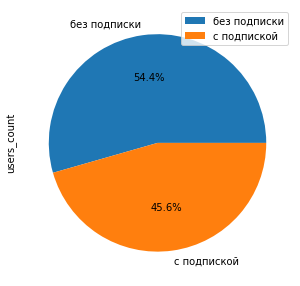

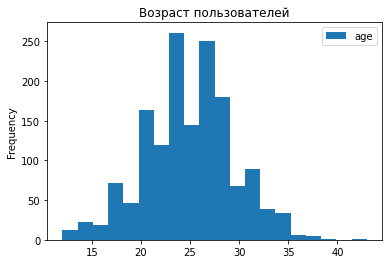

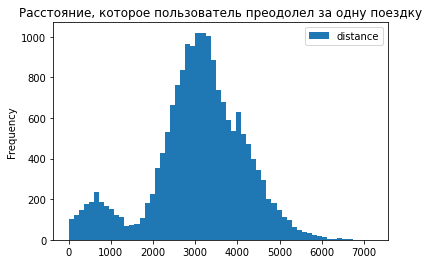

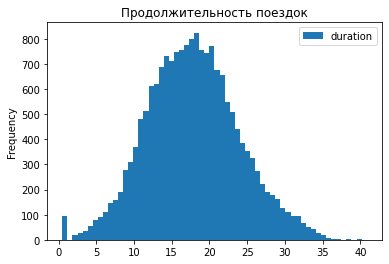

In [4]:
users_go_city=users_go.pivot_table(index='city', values='name',aggfunc='count')
users_go_city=users_go_city.reset_index()
users_go_city=users_go_city.sort_values(by='name', ascending=False)
display('Частота встречаемости городов')
display(users_go_city)
users_go_subscription=users_go.pivot_table(index='subscription_type', values='user_id',aggfunc='count')
users_go_subscription=users_go_subscription.reset_index()
users_go_subscription=users_go_subscription.sort_values(by='user_id', ascending=False)
display('Cоотношение пользователей с подпиской и без подписки')
users_go_subscription.columns=['subscription_type','users_count']
display(users_go_subscription)
users_go_subscription.plot.pie(y='users_count' ,labels=['без подписки','с подпиской'],figsize=(5, 5),autopct='%1.1f%%')
users_go.plot(kind='hist', y='age',title='Возраст пользователей', bins=20)
rides_go.plot(kind='hist', y='distance',title='Расстояние, которое пользователь преодолел за одну поездку', bins=60)
rides_go.plot(kind='hist', y='duration',title='Продолжительность поездок', bins=60)
plt.show();

Вывод: Частота поездок по городам и подпискам примерно одинакова, что позволяет сопоставлять данные. Средний возраст пользователей 25 лет, расстояние 3000 м, продолжительность 17 минут. Количество пользователей без подписки составляет 54,1 %.

#### Шаг 4. Объединение данных

'Размерность rides_go'

(18068, 5)

'Размерность users_go'

(1534, 5)

'Размерность rides'

(18068, 12)

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


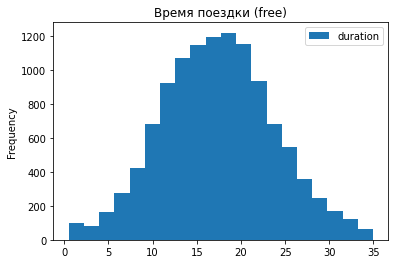

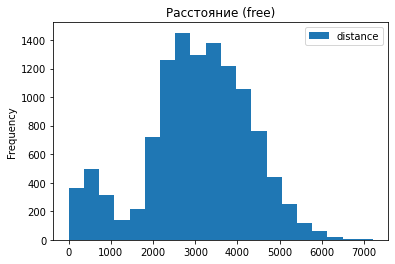

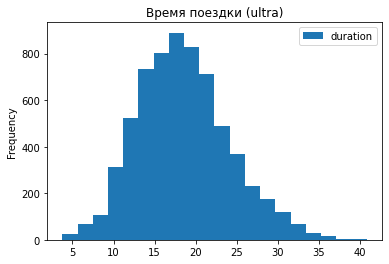

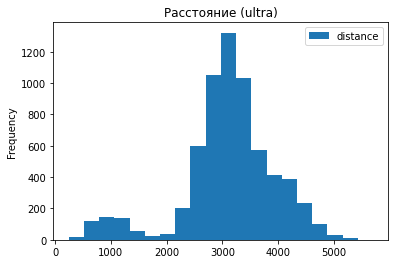

In [5]:
#объединение в один датафрейм rides
display('Размерность rides_go',rides_go.shape)
display('Размерность users_go',users_go.shape)
rides=rides_go.merge(users_go, on='user_id', how='left')
rides=rides.merge(subscriptions_go, on='subscription_type', how='left')
display('Размерность rides',rides.shape)
#поиск нулевых значений
display(rides.isna().sum())
#создание датафреймов с данными о пользователях с подпиской и без
rides_free=rides.query('subscription_type=="free"')
rides_ultra=rides.query('subscription_type=="ultra"')
rides_free.plot(kind='hist', y='duration',title='Время поездки (free)', bins=20)
rides_free.plot(kind='hist', y='distance',title='Расстояние (free)', bins=20)
rides_ultra.plot(kind='hist', y='duration',title='Время поездки (ultra)', bins=20)
rides_ultra.plot(kind='hist', y='distance',title='Расстояние (ultra)', bins=20)
#вывод заголовков созданных датасетов
display(rides.head(5))
display(rides_free.head(5))
display(rides_ultra.head(5))
plt.show();

Вывод: среднее время поездки и расстояние для пользователей с платной подпиской и без составляет 17 минут, 3000 метров сооветственно

#### Шаг 5. Подсчёт выручки

user_id              0
month                0
distance             0
duration             0
rides_count          0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

,user_id,month,distance,duration,rides_count,subscription_type,minute_price,start_ride_price,subscription_fee,total_price
0,1,1,7027.511294,42.0,12,ultra,6,0,199,451.0
1,1,4,754.159807,7.0,12,ultra,6,0,199,241.0
2,1,8,6723.470560,45.0,12,ultra,6,0,199,469.0
3,1,10,5809.911100,32.0,12,ultra,6,0,199,391.0
4,1,11,7003.499363,54.0,12,ultra,6,0,199,523.0


<AxesSubplot:title={'center':'Зависимость стоимости поездок от месяца года'}, xlabel='month'>

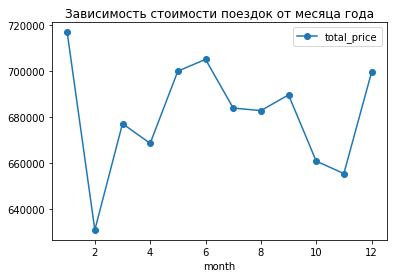

In [6]:
#создание датафрейма с данными о пользователях
rides_users=rides.pivot_table(index=['user_id','month'], values=['distance', 'duration'], aggfunc='sum')
rides_users=rides_users.reset_index()
rides_users=rides_users.merge(rides.pivot_table(index='user_id', values='month', aggfunc='count'), on='user_id', how='left')
rides_users.columns=['user_id','month','distance','duration','rides_count']
rides_users['duration']=round(rides_users['duration'],1)
rides_users=rides_users.merge(rides[['user_id','subscription_type','minute_price','start_ride_price','subscription_fee']].drop_duplicates(), on='user_id', how='inner')
rides_users['duration'] = np.ceil(rides_users['duration']) 
#поиск нулевых значений
display(rides_users.isna().sum())
#расчет выручки
rides_users['total_price']=rides_users['start_ride_price']*rides_users['rides_count']+rides_users['minute_price']*rides_users['duration']+rides_users['subscription_fee']
display(rides_users.head(5))
rides_users.pivot_table(index=['month'], values=['total_price'], aggfunc='sum').plot(y='total_price', style='-o',title='Зависимость стоимости поездок от месяца года')

Вывод: Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
В этот же датафрейм добавлен столбец с помесячной выручкой, которую принёс каждый пользователь.
Наибольшие траты наблюдаются по графику в летние месяцы. 

#### Шаг 6. Проверка гипотез

6.1

Нулевая гипотеза:  Среднее время поездки у пользователей без подписки равно времени пользователей с подпиской.

Альтернативная гипотеза: Среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки.

In [7]:
# задаём уровень значимости
alpha = 0.05
# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(rides_ultra['duration'],rides_free['duration'], alternative='greater')
print(f'p-value: {results.pvalue}')
# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Вывод: гипотеза неверна. Пользователи без подписки тратят больше времени на поездки, чем пользователи с подпиской

6.2

Нулевая гипотеза: подписчики в среднем проезжают расстояние в 3130 метров

Альтернативная гипотеза: подписчики в среднем проезжают расстояние больше оптимального в 3130 метров

In [8]:
optimal_value = 3130

alpha = 0.05

results = st.ttest_1samp(
    rides_users['distance'][rides_users['subscription_type'] == 'ultra'], optimal_value,alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.883541374011314e-278
Отвергаем нулевую гипотезу


Вывод: Нулевая гипотеза неверна. Подписчики в среднем проезжают расстояние больше оптимального в 3130 метров

6.3

Нулевая гипотеза: помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки
Альтернативная гипотеза:помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [9]:
# задаём уровень значимости
alpha = 0.05
# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(rides_users.query('subscription_type == "ultra"')['total_price'],rides_users.query('subscription_type == "free"')['total_price'], alternative='greater')
print(f'p-value: {results.pvalue}')
# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.0
Нет оснований отвергнуть нулевую гипотезу


Вывод: гипотеза верна. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки 

6.4

Лучше подойдет для проверки гипотезы scipy.stats.ttest_rel 
Аргументы: наборы данных — парные выборки до и после изменения

Вывод:пользоватили без подписки тратят больше времени. Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

# Общий вывод: 
Были обработаны данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализированы данные и проверены некоторые гипотезы, которые могут помочь бизнесу вырасти. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

* Пропуски и нулевые значения в датафреймах отсутствуют, явные дубликаты удалены
* Частота поездок по городам и подпискам примерно одинакова, что позволяет сопоставлять данные. Средний возраст пользователей 25 лет, расстояние 3000 м, продолжительность 17 минут. Количество пользователей без подписки составляет 54,1 %
* Cреднее время поездки и расстояние для пользователей с платной подпиской и без составляет 17 минут, 3000 метров сооветственно
* Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. В этот же датафрейм добавлен столбец с помесячной выручкой, которую принёс каждый пользователь. Наибольшие траты наблюдаются по графику в летние месяцы.


Сформулированы и проверены гипотезы, выводы по ним следующие: 
* пользователи без подписки тратят больше времени на поездки, чем пользователи с подпиской
* подписчики в среднем проезжают расстояние больше оптимального в 3130 метров
* помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

